# DATASET DESCRIPTION

- This dataset contains food delivery records, capturing key factors influencing delivery times. It includes attributes such as distance traveled, weather conditions, traffic level, time of day, and vehicle type, all of which impact delivery efficiency. Additionally, courier experience and preparation time are recorded, offering insights into operational factors affecting service speed. The target variable, Delivery_Time_min, represents the actual time taken for each order's delivery. Given your proficiency in preprocessing and model training, this dataset is well-suited for regression analysis or predictive modeling
- [Food Delivery Time Prediction Dataset](https://www.kaggle.com/datasets/denkuznetz/food-delivery-time-prediction)


# IMPORTING LIBRARIES
- pandas (pd): Used for data manipulation and analysis.
- numpy (np): Provides numerical operations and array handling.
- matplotlib.pyplot (plt): Enables data visualization through plots and graphs.

 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# LOADING DATASET

In [2]:
df = pd.read_csv("C:/Users/Ayaan/Desktop/Food_Delivery_Times.csv")
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


# DATA EXPLORATION

In [3]:
df.sample()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
68,71,15.56,Clear,Medium,Evening,Bike,14,3.0,54


In [4]:
df.tail()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
995,107,8.50,Clear,High,Evening,Car,13,3.0,54
996,271,16.28,Rainy,Low,Morning,Scooter,8,9.0,71
997,861,15.62,Snowy,High,Evening,Scooter,26,2.0,81
998,436,14.17,Clear,Low,Afternoon,Bike,8,0.0,55
999,103,6.63,Foggy,Low,Night,Scooter,24,3.0,58


In [5]:
df.shape

(1000, 9)

In [6]:
df.columns

Index(['Order_ID', 'Distance_km', 'Weather', 'Traffic_Level', 'Time_of_Day',
       'Vehicle_Type', 'Preparation_Time_min', 'Courier_Experience_yrs',
       'Delivery_Time_min'],
      dtype='object')

In [7]:
df.isnull().any()

Order_ID                  False
Distance_km               False
Weather                    True
Traffic_Level              True
Time_of_Day                True
Vehicle_Type              False
Preparation_Time_min      False
Courier_Experience_yrs     True
Delivery_Time_min         False
dtype: bool

In [8]:
df.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,970.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.579381,56.732000
std,288.819436,5.696656,7.204553,2.914394,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


# DATA CLEANING

In [10]:
numeric_cols = df.select_dtypes(include=[np.number])
non_numeric_cols = df.select_dtypes(exclude=[np.number])

In [11]:
numeric_cols.fillna(numeric_cols.mean(), inplace=True)
non_numeric_cols.fillna(non_numeric_cols.mode().iloc[0], inplace=True)

In [12]:
df = pd.concat([numeric_cols, non_numeric_cols], axis=1)

In [13]:
print(df.isnull().sum())

Order_ID                  0
Distance_km               0
Preparation_Time_min      0
Courier_Experience_yrs    0
Delivery_Time_min         0
Weather                   0
Traffic_Level             0
Time_of_Day               0
Vehicle_Type              0
dtype: int64


# REMOVING DUBLICATES

In [14]:
df.drop_duplicates(inplace=True)

df = df.loc[:, ~df.columns.str.contains("Unnamed")]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Preparation_Time_min    1000 non-null   int64  
 3   Courier_Experience_yrs  1000 non-null   float64
 4   Delivery_Time_min       1000 non-null   int64  
 5   Weather                 1000 non-null   object 
 6   Traffic_Level           1000 non-null   object 
 7   Time_of_Day             1000 non-null   object 
 8   Vehicle_Type            1000 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


# OUTLIER DETECTION AND REMOVAL

In [15]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
mask = pd.Series(True, index=df.index)

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mask &= df[col].between(lower_bound, upper_bound)

df_cleaned = df[mask]

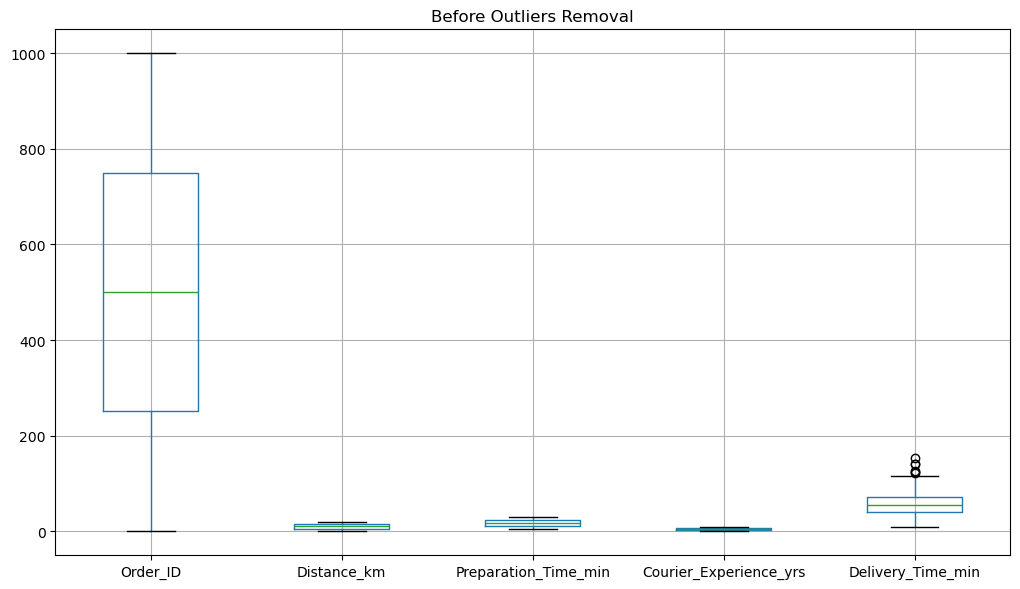

In [16]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
df.boxplot()
plt.title("Before Outliers Removal")
plt.tight_layout()
plt.show()

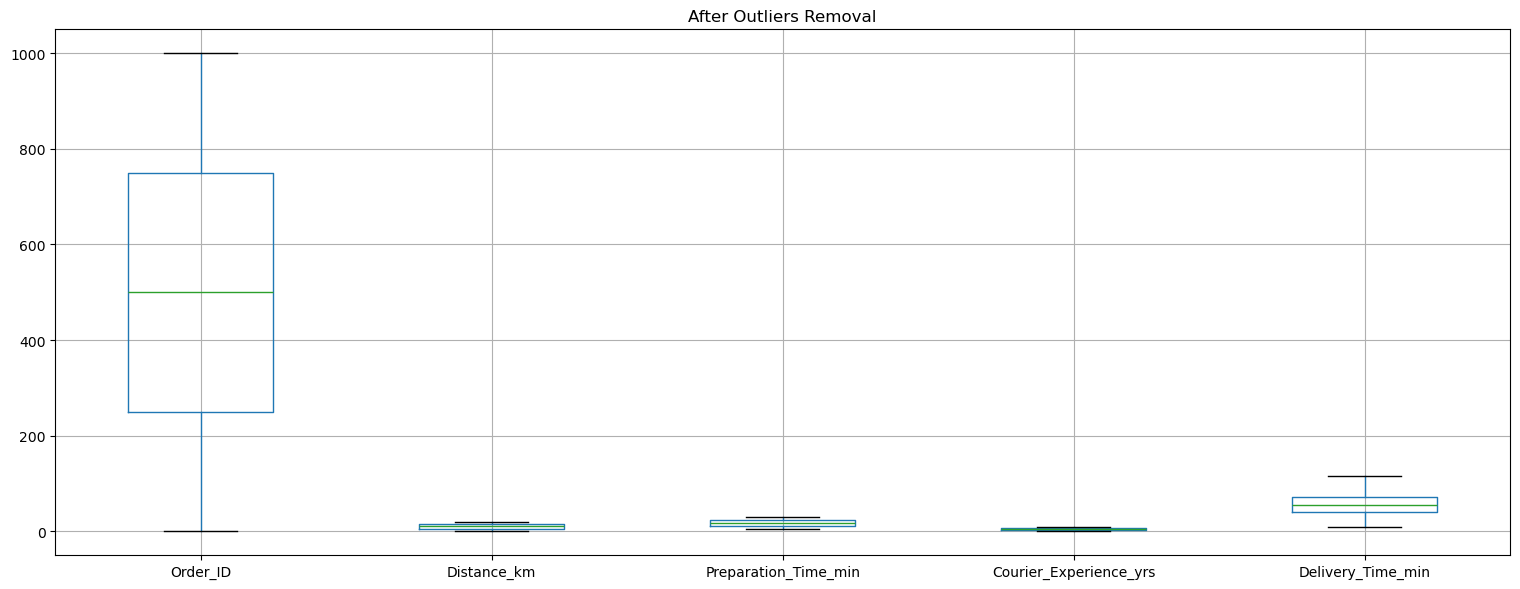

In [17]:
plt.figure(figsize=(30,6))
plt.subplot(1,2,1)
df_cleaned.boxplot()
plt.title("After Outliers Removal")
plt.tight_layout()
plt.show()

# DATA TRANSFORMATION

- NORMALIZATION

In [18]:
from sklearn.preprocessing import MinMaxScaler

numeric_cols = df.select_dtypes(include=['float64']).columns
numeric_data = df[numeric_cols]
scaler = MinMaxScaler()
scaled_numeric_data = scaler.fit_transform(numeric_data)
scaled_numeric_data = pd.DataFrame(scaled_numeric_data, columns=numeric_cols)
non_numeric_data = df.drop(columns=numeric_cols).reset_index(drop=True)
scaled_data = pd.concat((scaled_numeric_data, non_numeric_data), axis=1)

print(scaled_data.shape)
print()
print('*' * 60)
scaled_data.head()

(1000, 9)

************************************************************


,Distance_km,Courier_Experience_yrs,Order_ID,Preparation_Time_min,Delivery_Time_min,Weather,Traffic_Level,Time_of_Day,Vehicle_Type
0,0.378351,0.111111,522,12,43,Windy,Low,Afternoon,Scooter
1,0.815979,0.222222,738,20,84,Clear,Medium,Evening,Bike
2,0.460309,0.111111,741,28,59,Foggy,Low,Night,Scooter
3,0.353093,0.111111,661,5,37,Rainy,Medium,Afternoon,Scooter
4,0.950515,0.555556,412,16,68,Clear,Low,Morning,Bike


- STANDARDIZATION

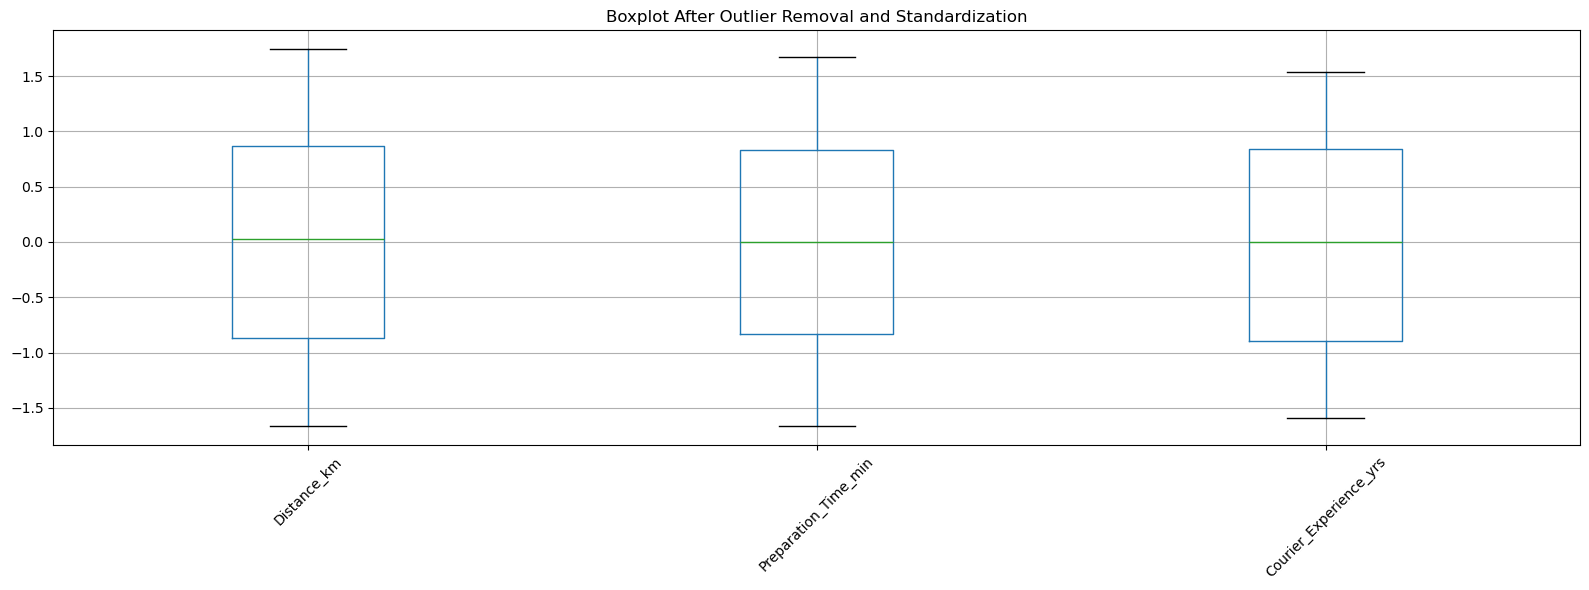

In [19]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

scaler = StandardScaler()

numeric_cols = ["Distance_km", "Preparation_Time_min", "Courier_Experience_yrs"]
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

data_scaled = pd.DataFrame(scaler.fit_transform(df[numeric_cols]), columns=numeric_cols)  

plt.figure(figsize=(16, 6))
data_scaled.boxplot()
plt.title("Boxplot After Outlier Removal and Standardization")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# LINAER REGRESSION

In [20]:
df = pd.get_dummies(df, columns=['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type'], drop_first=True)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

### TEST TRAIN SPLIT

In [22]:
X = df.drop('Delivery_Time_min', axis=1)
y = df['Delivery_Time_min']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### MODEL FIT

In [23]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# ACTUAL VS PREDICTED GRAPGH

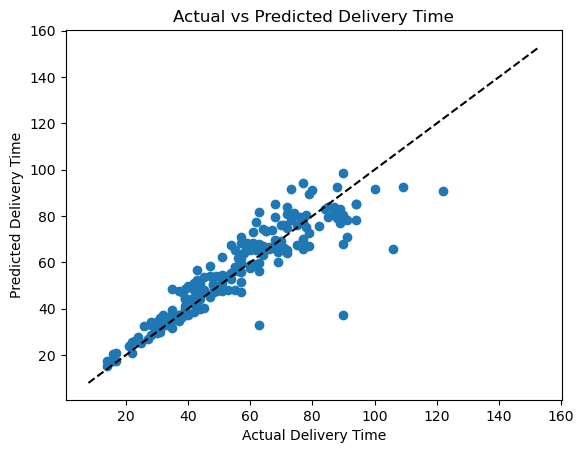

In [24]:
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.xlabel('Actual Delivery Time')
plt.ylabel('Predicted Delivery Time')
plt.title('Actual vs Predicted Delivery Time')
plt.show()

## COEFFICIENT

In [25]:
model_coef = model.coef_
model_coef.round(2)

array([ -0.  ,  17.08,   6.97,  -1.93,   5.79,   4.65,   9.26,   1.37,
       -11.15,  -5.48,   0.94,  -0.23,  -1.37,   0.58,  -0.96])

## INTERCEPT

In [26]:
model_intercept = model.intercept_
model_intercept.round(2)

61.58

## ACTUAL AND PREDICTED DELIVERY TIMES

In [27]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print("\nActual vs Predicted Delivery Times:")
print(df_preds.head(10))


Actual vs Predicted Delivery Times:
     Actual  Predicted
521      32  35.048506
737      68  66.904694
740      39  44.315087
660      44  44.230609
411      85  79.570774
678      31  31.684478
626      77  69.981899
513      33  32.936517
859      90  37.218670
136      91  78.523902
